In [69]:
import pandas as pd
import numpy as np
import re
from utils import cleaning, eda
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv("dataset/world_energy_consumption.csv")

In [71]:
df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_generation,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,Afghanistan,1900,AFG,4832414.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1901,AFG,4879685.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1902,AFG,4935122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [72]:
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=128)

In [73]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22343 entries, 0 to 22342
Data columns (total 128 columns):
 #    Column                                        Dtype  
---   ------                                        -----  
 0    country                                       object 
 1    year                                          int64  
 2    iso_code                                      object 
 3    population                                    float64
 4    gdp                                           float64
 5    biofuel_cons_change_pct                       float64
 6    biofuel_cons_change_twh                       float64
 7    biofuel_cons_per_capita                       float64
 8    biofuel_consumption                           float64
 9    biofuel_elec_per_capita                       float64
 10   biofuel_electricity                           float64
 11   biofuel_share_elec                            float64
 12   biofuel_share_energy                        

In [74]:
# Dump value counts
cleaning.dump_value_counts('data_expl/', df)

Try to subdivide the dataset in other sub-dataset.
1. One will be the ones with all the primary energy productions, consumption,
   shares etc.
2. Other will be with overall measures such as overall energy production
<br><br>
After that, an EDA will be performed, it will also be easier to understand the <br> 
dataset's behaviour (missing data per country, missing data per energy src etc.) <br>
These sub-dataset can be indexed by the identifiers that reports general id like <br>
country, population and gdp. 

Which kind of data is available for energy src?

In [75]:
# Categorize columns
pure_energy_src = ['biofuel', 'coal', 'gas', 'hydro', 'nuclear', 'oil', 'solar', 'wind']
aggragated_energy_src = ['fossil', 'low-carbon', 'other-renewables', 'other-renewables-exc-biofuel', 'renewables']
overall_energy_measures = ['energy_cons_change_pct', 'energy_cons_change_pct', 
                    'carbon_intensity_elec', 'electricity_generation', 
                    'fossil_electricity', 'renewables_electricity',
                    'energy_per_gdp', 'energy_per_capita', 
                    'per_capita_electricity', 'primary_energy_consumption']
identifiers = ['iso_code', 'country', 'year', 'population', 'gdp']

In [76]:
# Std consumption and production names:
# production --> prod
# consumption --> cons
# electricity --> elec
df_std = df.copy()

df_std.columns = df.columns.str.replace('production', 'prod').str.replace('electricity', 'elec').str.replace('consumption', 'cons')
df_std.columns = df_std.columns.str.replace('renewable', 'renewables')
df_std.columns = df_std.columns.str.replace('renewabless', 'renewables')
df_std.columns = df_std.columns.str.replace('low_carbon', 'low-carbon')
df_std.columns = df_std.columns.str.replace('other_renewables', 'other-renewables')
df_std.columns = df_std.columns.str.replace('other-renewables_exc_biofuel_electricity', 'other-renewables-exc-biofuel_elec')
df_std.columns = df_std.columns.str.replace('other-renewables_elec_per_capita_exc_biofuel', 'other-renewables-exc-biofuel_elec_per_capita')
df_std.columns = df_std.columns.str.replace('other-renewables_share_elec_exc_biofuel', 'other-renewables-exc-biofuel_share_elec')
df_std.columns = df_std.columns.str.replace('other-renewables_exc_biofuel', 'other-renewables-exc-biofuel')

# if after a energy src "energy" is present, it is an alias for primary energy consumption "cons" and could be substitued
old_cols = list(df_std.columns)
new_cols = old_cols
for i in range(len(df.columns)):
    # Check that col refer to an energy src and 'energy' keyword is in 2nd position
    splitted_col = old_cols[i].split('_')
    if splitted_col[0] in (pure_energy_src+aggragated_energy_src) and splitted_col[1] == 'energy':
        splitted_col[1] = 'cons'
        new_cols[i] = '_'.join(splitted_col)

df_std.columns = new_cols

### Template column
energysrc_measure_opt_measure_opt_unit

For each pure energy src we have the following:
1. Consumption data **cons**
   For **cons** data then we have
   1. Primary fuel consumption if only **cons** in terawatt-hours
   2. **change** --> representing annual change in energy src consumption
      1. **change** can be percentatage with **pct**
      2. **change** can be in terawatt-hours with **twh**
   3. **per_capita** if measured in terwatt-hours per capita
2. Electricity consumption from the energy src with **elec**:
   1. Pure electricity consumption if only **elec** in terawatt-hours
   2. **per_capita** if electricity is measured per capita
3. **share** when accounting for the share among the other energy srcs:
   1. could be **elec** referring to electricity consuption;
   2. could be **energy** when accounting for energy srcs
4. **prod** accounts for prod (elec+thermal?) using the energy source:
   1. if no additional keywords, is the overall production in terawatt hours;
   2. with **per_capita** accounts with the production per capita in twh;
   3. with **change** keyword accounts for the annual change in production:
      1. could be percentage if **pct**
      2. could be in twh if **twh**

In [77]:
# What type of measures are available for pure energy srcs
measures_type = [([col for col in df_std.columns if energy == col.split('_')[0]]) for energy in pure_energy_src]
measures_per_energy = {pure_energy_src[i]: measures_type[i] for i in range(len(measures_type))}
measures_per_energy

{'biofuel': ['biofuel_cons_change_pct',
  'biofuel_cons_change_twh',
  'biofuel_cons_per_capita',
  'biofuel_cons',
  'biofuel_elec_per_capita',
  'biofuel_elec',
  'biofuel_share_elec',
  'biofuel_share_energy'],
 'coal': ['coal_cons_change_pct',
  'coal_cons_change_twh',
  'coal_cons_per_capita',
  'coal_cons',
  'coal_elec_per_capita',
  'coal_elec',
  'coal_prod_change_pct',
  'coal_prod_change_twh',
  'coal_prod_per_capita',
  'coal_prod',
  'coal_share_elec',
  'coal_share_energy'],
 'gas': ['gas_cons_change_pct',
  'gas_cons_change_twh',
  'gas_cons',
  'gas_elec_per_capita',
  'gas_elec',
  'gas_cons_per_capita',
  'gas_prod_change_pct',
  'gas_prod_change_twh',
  'gas_prod_per_capita',
  'gas_prod',
  'gas_share_elec',
  'gas_share_energy'],
 'hydro': ['hydro_cons_change_pct',
  'hydro_cons_change_twh',
  'hydro_cons',
  'hydro_elec_per_capita',
  'hydro_elec',
  'hydro_cons_per_capita',
  'hydro_share_elec',
  'hydro_share_energy'],
 'nuclear': ['nuclear_cons_change_pct',
  '

In [78]:
# How many measures are available for pure energy srcs
n_measures = [len([col for col in df_std.columns if energy == col.split('_')[0]]) for energy in pure_energy_src]
measures_per_energy = {pure_energy_src[i]: n_measures[i] for i in range(len(n_measures))}
measures_per_energy

{'biofuel': 8,
 'coal': 12,
 'gas': 12,
 'hydro': 8,
 'nuclear': 8,
 'oil': 12,
 'solar': 8,
 'wind': 8}

In [79]:
# What type of measures are available for aggregated energy srcs
measures_type = [([col for col in df_std.columns if energy == col.split('_')[0]]) for energy in aggragated_energy_src]
measures_per_energy = {aggragated_energy_src[i]: measures_type[i] for i in range(len(measures_type))}
measures_per_energy

{'fossil': ['fossil_cons_change_pct',
  'fossil_cons_change_twh',
  'fossil_elec_per_capita',
  'fossil_elec',
  'fossil_cons_per_capita',
  'fossil_fuel_cons',
  'fossil_share_elec',
  'fossil_share_energy'],
 'low-carbon': ['low-carbon_cons_change_pct',
  'low-carbon_cons_change_twh',
  'low-carbon_cons',
  'low-carbon_elec_per_capita',
  'low-carbon_elec',
  'low-carbon_cons_per_capita',
  'low-carbon_share_elec',
  'low-carbon_share_energy'],
 'other-renewables': ['other-renewables_cons',
  'other-renewables_elec',
  'other-renewables_cons_change_pct',
  'other-renewables_cons_change_twh',
  'other-renewables_elec_per_capita',
  'other-renewables_cons_per_capita',
  'other-renewables_share_elec',
  'other-renewables_share_energy'],
 'other-renewables-exc-biofuel': ['other-renewables-exc-biofuel_elec',
  'other-renewables-exc-biofuel_elec_per_capita',
  'other-renewables-exc-biofuel_share_elec'],
 'renewables': ['renewables_cons_change_pct',
  'renewables_cons_change_twh',
  'renewa

In [80]:
n_measures = [len([col for col in df_std.columns if energy == col.split('_')[0]]) for energy in aggragated_energy_src]
measures_per_energy = {aggragated_energy_src[i]: n_measures[i] for i in range(len(n_measures))}
measures_per_energy

{'fossil': 8,
 'low-carbon': 8,
 'other-renewables': 8,
 'other-renewables-exc-biofuel': 3,
 'renewables': 8}

In [81]:
[col for col in df.columns if 'exc' in col]

['other_renewable_exc_biofuel_electricity',
 'other_renewables_elec_per_capita_exc_biofuel',
 'other_renewables_share_elec_exc_biofuel']

Data is formatted now

### Data cleaning
1. Select most recent years (chose an initial year depending on missing data)
2. Drop country where too missing data is available
3. Drop columns that are not useful to the analysis or still too many missing data

In [82]:
# Slice the data for the last *40* years
start_year = 1980
df_prep = df_std.copy()
df_prep = df_prep.loc[df.year >= start_year].reset_index(drop=True)

In [83]:
# Columns with many missing data
nan_perc_threshold = 30
report = eda.report(df_prep)
report.insert(1, 'nan_perc', round(report['nan_count']/len(df_std)*100, 2))
report = report.sort_values(by='nan_perc', ascending=False)
cols_to_drop = list(report.loc[report.nan_perc >= nan_perc_threshold].index)

# Drop that columns
cols_to_drop.append('iso_code') # No really interested in ISO code for now
df_prep = df_prep.drop(cols_to_drop, axis=1)
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12309 entries, 0 to 12308
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           12309 non-null  object 
 1   year                              12309 non-null  int64  
 2   population                        9321 non-null   float64
 3   gdp                               6275 non-null   float64
 4   coal_elec_per_capita              5641 non-null   float64
 5   coal_elec                         6437 non-null   float64
 6   coal_prod_change_twh              9391 non-null   float64
 7   coal_prod_per_capita              8326 non-null   float64
 8   coal_prod                         9564 non-null   float64
 9   coal_share_elec                   6387 non-null   float64
 10  elec_generation                   7181 non-null   float64
 11  energy_cons_change_pct            10867 non-null  float64
 12  ener

### Data interpolation

Does not make sense for population and gdp

In [84]:
# Linear(?) interpolation of the data
#### Fails for gdp
# num_cols = list(df_prep.select_dtypes(np.number).columns)
# df_prep[num_cols] = df_prep[num_cols].interpolate(method='linear', axis=1)
# df_prep.info()

#For Items like GDP  it doesnt make sense to replace the null values with a 0 ,so let's try FWD fill and then backwards fill
#looks like we have a lot of empty Values
nulls=df_prep.isna().sum()
for i in nulls.index:
    if nulls[i]>0:
        df_prep[i].ffill(inplace=True)
        df_prep[i].bfill(inplace=True)
df_prep.isna().sum().sum() # Check total null values is 0

0

In [85]:
# # All missing data per 
# nan_count_per_row = df.isnull().sum(axis=1)
# nan_count = df_std[['country', 'year']]
# nan_count['tot_nan'] = nan_count_per_row
# nan_count_per_country = pd.DataFrame(nan_count.groupby(["country"])['tot_nan'].sum()).sort_values('tot_nan')
# nan_count_per_year = pd.DataFrame(nan_count.groupby(["year"])['tot_nan'].sum()).sort_values('tot_nan')
# nan_count_per_year

### EDA

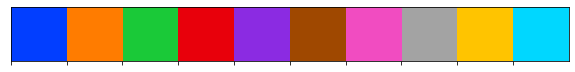

In [86]:
# Select palette
palette="bright"
sns.set_palette(palette)
sns.palplot(sns.color_palette(palette))
plt.show()

dfprep1 --> dfprep with country filter

In [87]:
# Country filters
europe = ['Italy', 'Spain', 'Portugal', 'Germany', 'France', 'Netherlands', 'Sweden', 'United Kingdom']
asia = ['China', 'Japan', 'India', 'Russia']


north_america = ['United States', 'Canada']
south_america = ['Argentina', 'Brasil', 'Uruguay', 'Chile', 'Mexico']
africa = ['Morocco', 'Libya', 'Tunisia', 'Egypt', 'South Africa']
new_zealand = ['Australia', 'New Zealand']
countries = ['Saudi Arabia','United Kingdom','France','Germany', 'Italy', 'Spain', 'United States','Japan','India', 'Canada', 'China']
df_prep1 = df_prep.loc[df_prep['country'].isin(europe)]

Text(0.5, 0.35, 'GDP per capita')

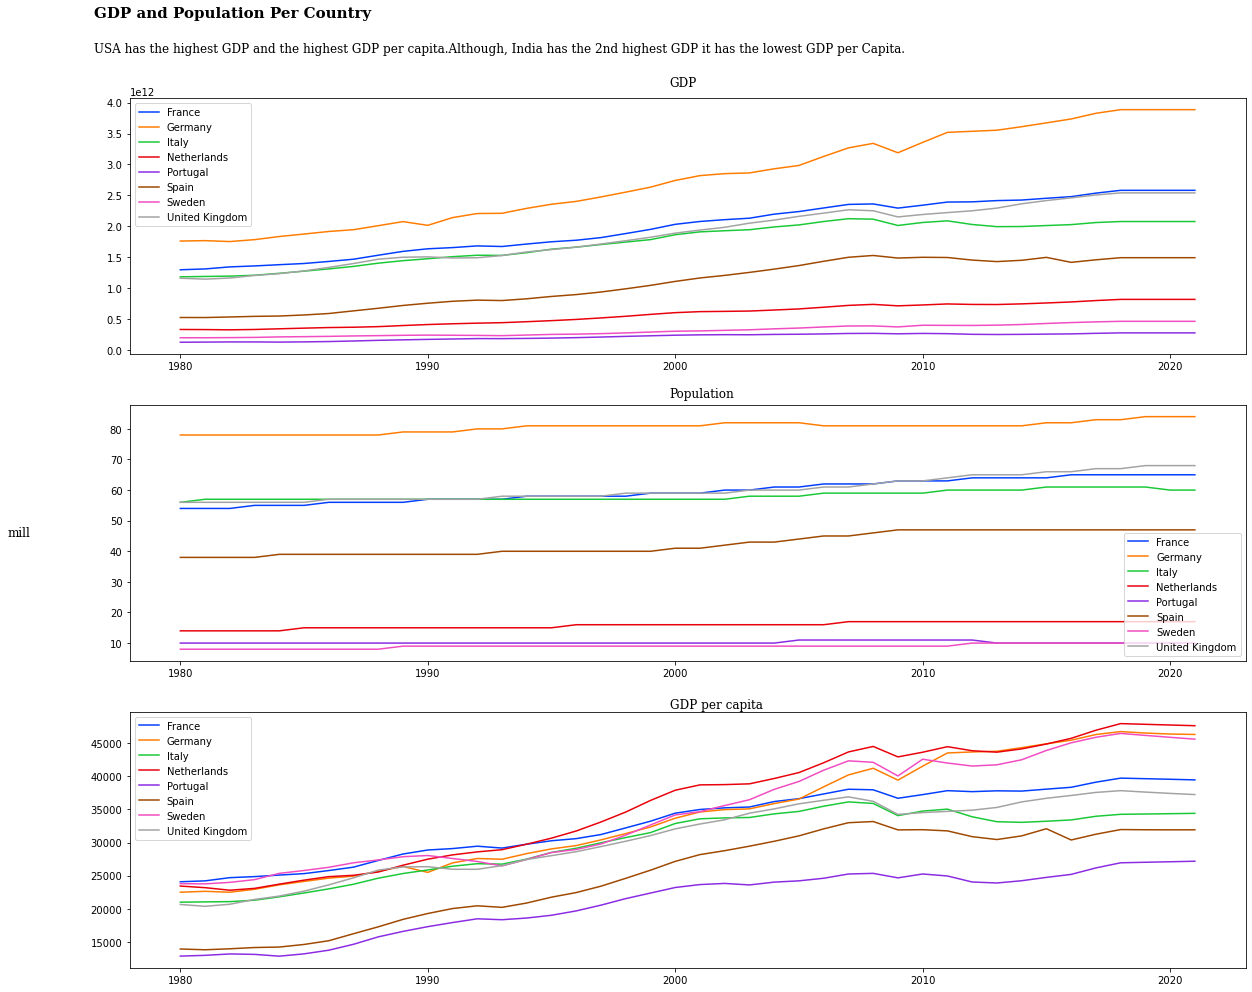

In [91]:
# lets plot the gdp , population and gdp per capita  per country
df_gdp=df_prep1.groupby(['year','country'])['gdp'].sum().unstack('country')
df_pop=df_prep1.groupby(['year','country'])['population'].sum().unstack('country')
df_pop_mil=round(df_pop/1000000)

df_prep1['gdp_per_capita']=round(df_prep1['gdp']/df_prep1['population'])
df_gdp_per_capita=df_prep1.groupby(['year','country'])['gdp_per_capita'].sum().unstack('country')
fig, ax = plt.subplots(3, 1, figsize=(20, 16))
ax[0].plot(df_gdp,label=df_gdp.columns)
ax[0].legend()
ax[1].plot(df_pop_mil,label=df_pop_mil.columns)
ax[1].legend()
ax[2].plot(df_gdp_per_capita,label=df_gdp_per_capita.columns)
ax[2].legend()
fig.text(0.1, 0.95, 'GDP and Population Per Country', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.1, 0.92, 
'''USA has the highest GDP and the highest GDP per capita.Although, India has the 2nd highest GDP it has the lowest GDP per Capita.'''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.04, 0.5, 
'''mill'''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.5, 0.89, 
'''GDP'''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.5, 0.62,
'''Population'''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.5, 0.35,
'''GDP per capita'''
, fontsize=12, fontweight='light', fontfamily='serif')

In [89]:
df_prep.country.unique()

array(['Afghanistan', 'Africa', 'Africa (BP)', 'Africa (Shift)',
       'Albania', 'Algeria', 'American Samoa', 'Angola', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Asia & Oceania (EIA)', 'Asia Pacific (BP)',
       'Asia and Oceania (Shift)', 'Australia',
       'Australia and New Zealand (EIA)', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'CIS (BP)', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central & South America (EIA)',
       'Central African Republic', 'Central America (BP)',
       'Central and South America (Shift)', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       "Cote d'Ivoire", 'Croati